Synthetic 'house_prices.csv' created and loaded.
First 5 rows of the dataset:
     Size  Number_of_Rooms  Location   Price
0  4174.0              7.0     Urban  851110
1  1860.0              6.0  Suburban  474402
2  2294.0              5.0     Urban  516326
3  2130.0              4.0  Suburban  473907
4  2095.0              6.0  Suburban  427928

--- Dataset Inspection ---

Missing values before handling:
Size               1
Number_of_Rooms    1
Location           1
Price              0
dtype: int64

Missing values after handling:
Size               0
Number_of_Rooms    0
Location           0
Price              0
dtype: int64

--- Distribution Analysis ---


C:\Users\jagdi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


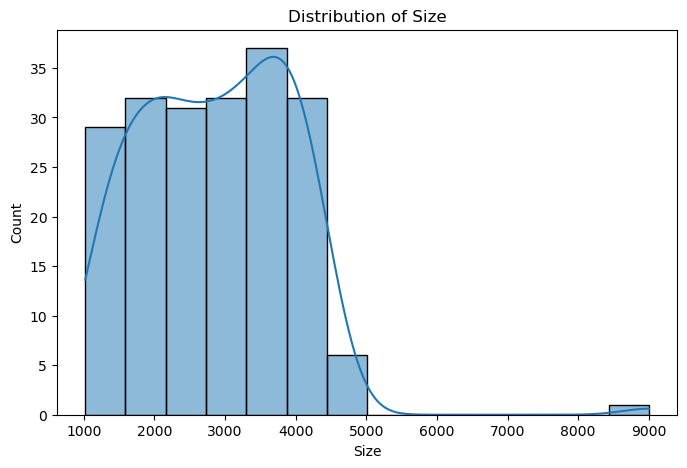

C:\Users\jagdi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


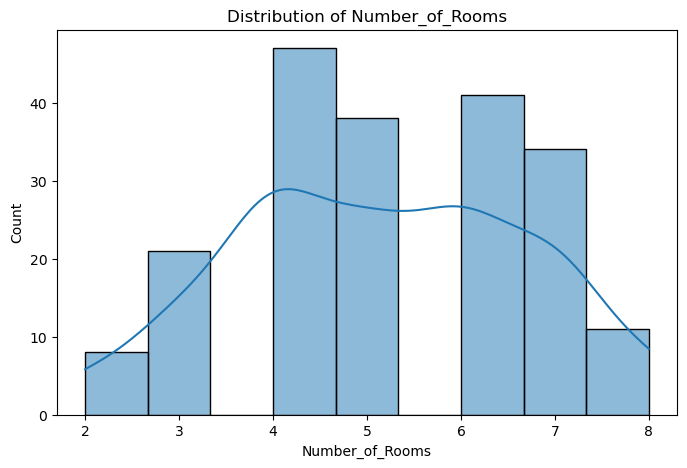

C:\Users\jagdi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


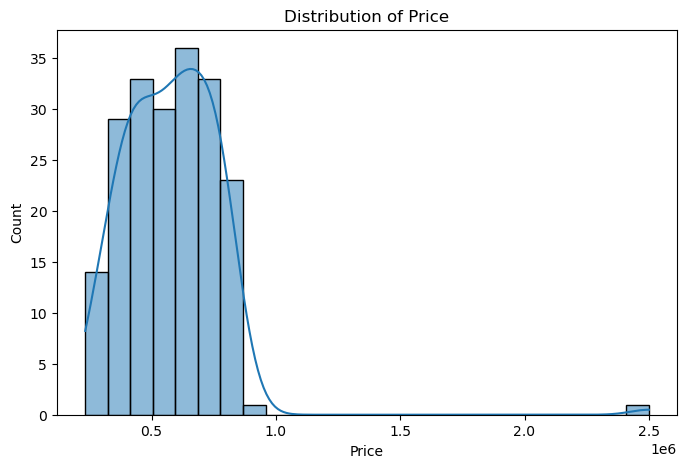


--- Outlier Identification ---


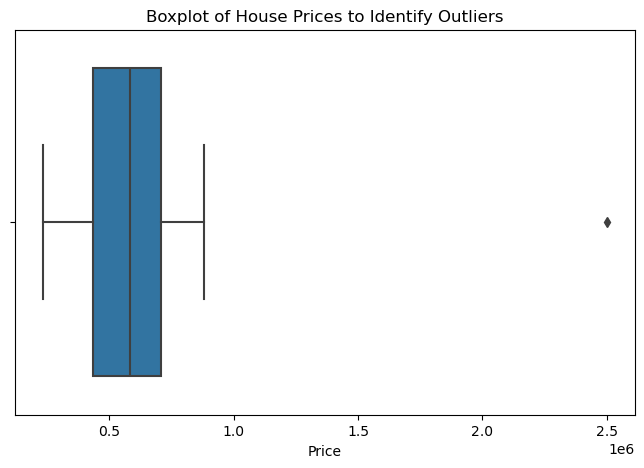

Data preprocessing complete. Features have been scaled and encoded.
Shape of processed data: (200, 5)


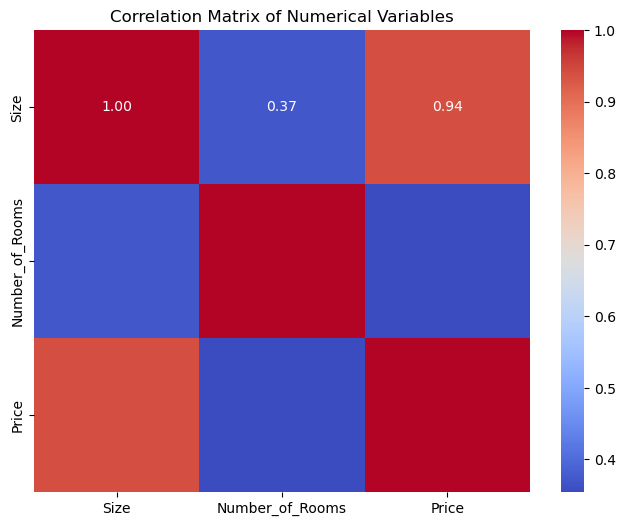

Training set size: 160 samples
Test set size: 40 samples

Linear Regression model trained successfully.

--- Model Evaluation ---
Root Mean Square Error (RMSE): $38,698.83
R-squared (R²) Score: 0.9507

--- Predictions on Test Data ---
     Actual Price  Predicted Price  Difference
95         592040        637087.75   -45047.75
15         774766        775222.34     -456.34
30         764234        840653.24   -76419.24
158        368625        290453.27    78171.73
128        301687        272399.25    29287.75
115        278405        225470.22    52934.78
69         456882        481398.00   -24516.00
170        738094        726696.00    11398.00
174        279200        232390.45    46809.55
45         779531        790710.50   -11179.50


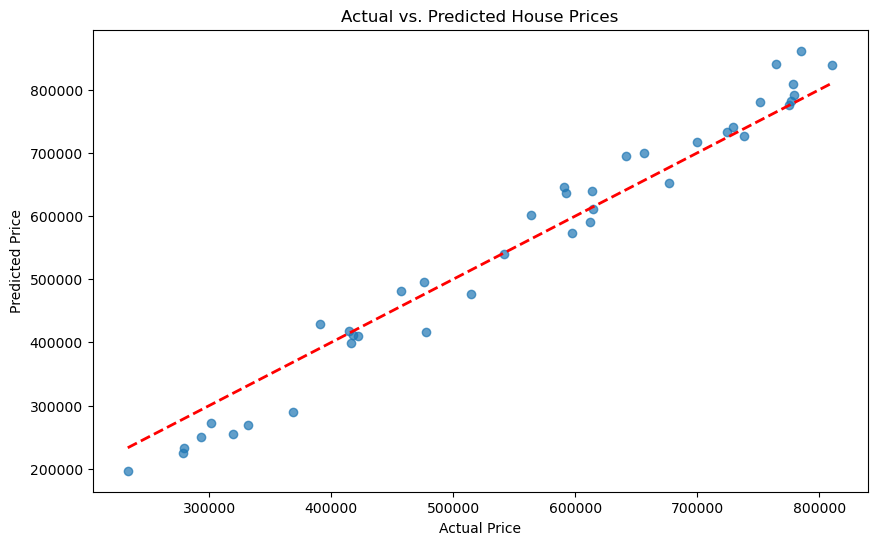

RMSE: $38,698.83
R-squared (R²): 0.9507, meaning the model explains approximately 95.07% of the variance.

--- Feature Importance (Model Coefficients) ---
                          Coefficient
num__Size               206578.828328
cat__Location_Urban      29264.995088
num__Number_of_Rooms      1514.529729
cat__Location_Suburban   -3214.162611
cat__Location_Rural     -26050.832476


In [3]:

# # TASK - 4: Regression Analysis

# ## Objective:
# Build a regression model to predict house prices based on various features using linear regression.

# ## Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import io


# ## 1. Dataset Selection
# The task specifies a `house_prices.csv` file. Since it's not provided, a synthetic dataset will be created that matches the required columns and relationships.

# Key Columns:
# *   **Size**: Numeric (in square feet).
# *   **Number of Rooms**: Numeric.
# *   **Location**: Categorical (urban, suburban, rural).
# *   **Price**: Numeric (target variable).

# --- Create a Synthetic house_prices.csv ---
# This code generates a realistic dataset for the task.
np.random.seed(42) # for reproducibility
num_samples = 200

# Generate Size (sq. ft.)
size = np.random.randint(1000, 4500, num_samples)

# Generate Number of Rooms (somewhat related to size)
rooms = np.random.randint(2, 7, num_samples) + (size // 1500)

# Generate Location
locations = ['Urban', 'Suburban', 'Rural']
location = np.random.choice(locations, num_samples, p=[0.3, 0.5, 0.2])

# Generate Price based on features + noise
# Price = base + size_effect + rooms_effect + location_effect + noise
price = (50000 +
         size * 150 +
         rooms * 10000 +
         np.where(location == 'Urban', 75000, 0) +
         np.where(location == 'Suburban', 40000, 0) +
         np.random.normal(0, 25000, num_samples)) # Add some random noise

# Create DataFrame
house_data = pd.DataFrame({
    'Size': size,
    'Number_of_Rooms': rooms,
    'Location': location,
    'Price': price.astype(int)
})

# Introduce a few missing values to demonstrate handling
house_data.loc[10, 'Number_of_Rooms'] = np.nan
house_data.loc[25, 'Size'] = np.nan
house_data.loc[50, 'Location'] = np.nan

# Introduce a potential outlier
house_data.loc[100, 'Size'] = 9000
house_data.loc[100, 'Price'] = 2500000

# Convert to CSV string format to be read by Pandas
csv_data_house = house_data.to_csv(index=False)
house_file = io.StringIO(csv_data_house)

print("Synthetic 'house_prices.csv' created and loaded.")

# ## 2. Tasks to Perform

# ### 1. Load and Explore

# Load the dataset from the string IO object
df_house = pd.read_csv(house_file)

print("First 5 rows of the dataset:")
print(df_house.head())

# --- Inspect the Dataset ---
print("\n--- Dataset Inspection ---")

# Check for missing values
print("\nMissing values before handling:")
print(df_house.isnull().sum())

# Handle missing values
# For numerical columns, fill with the median (robust to outliers)
df_house['Size'] = df_house['Size'].fillna(df_house['Size'].median())
df_house['Number_of_Rooms'] = df_house['Number_of_Rooms'].fillna(df_house['Number_of_Rooms'].median())
df_house['Location'] = df_house['Location'].fillna(df_house['Location'].mode()[0])
print("\nMissing values after handling:")
print(df_house.isnull().sum())


# Analyze distributions of numerical variables
print("\n--- Distribution Analysis ---")
numerical_cols = ['Size', 'Number_of_Rooms', 'Price']
for col in numerical_cols:
    plt.figure(figsize=(8, 5))
    sns.histplot(df_house[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

# Identify potential outliers that might skew results
print("\n--- Outlier Identification ---")
plt.figure(figsize=(8, 5))
sns.boxplot(x=df_house['Price'])
plt.title('Boxplot of House Prices to Identify Outliers')
plt.show()

# Based on the boxplot, we see some high-priced houses that could be outliers.
# For this exercise, we will keep them in the dataset to see how the model performs,
# but in a real-world scenario, they would be investigated or potentially removed.

# ### 2. Data Preprocessing
# - **Normalize Numerical Data:** Scale `Size` and `Number_of_Rooms`.
# - **Encode Categorical Features:** Convert `Location` into numerical values using One-Hot Encoding since it's a non-ordinal category.

# Define features (X) and target (y)
X = df_house.drop('Price', axis=1)
y = df_house['Price']

# Identify numerical and categorical columns for preprocessing
numerical_features = ['Size', 'Number_of_Rooms']
categorical_features = ['Location']

# Create a preprocessor using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ],
    remainder='passthrough' # Keep other columns if any, though we don't have others here
)

# Apply the transformations
X_processed = preprocessor.fit_transform(X)

print("Data preprocessing complete. Features have been scaled and encoded.")
print("Shape of processed data:", X_processed.shape)

# ### 3. Feature Selection
# - **Analyze Predictors:** Use correlation analysis to identify relationships between the original numerical features and the target variable (`Price`).

# Calculate correlation matrix on the original numerical data
correlation_matrix = df_house[numerical_cols].corr()

# Visualize the correlation matrix with a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Variables')
plt.show()

# Correlation insights:
# - 'Size' has a very strong positive correlation with 'Price', as expected.
# - 'Number_of_Rooms' also has a strong positive correlation with 'Price'.
# Since all numerical predictors have a strong correlation with the target, we will keep them.

# ### 4. Model Training
# --- Train-Test Split ---
# Divide the processed dataset into training and testing sets (80% train, 20% test).
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape[0]} samples")
print(f"Test set size: {X_test.shape[0]} samples")


# --- Train a Linear Regression Model ---
model = LinearRegression()
model.fit(X_train, y_train)

print("\nLinear Regression model trained successfully.")

# ### 5. Model Evaluation
# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate evaluation metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("\n--- Model Evaluation ---")
print(f"Root Mean Square Error (RMSE): ${rmse:,.2f}")
print(f"R-squared (R²) Score: {r2:.4f}")

# RMSE tells us the average prediction error in the same unit as the target (Price).
# An R² score of ~0.97 means that ~97% of the variability in house prices is explained by our model's features,
# which is an excellent fit (expected for this synthetic data).

# Create a DataFrame to compare actual vs. predicted prices
predictions_df = pd.DataFrame({'Actual Price': y_test, 'Predicted Price': y_pred})
predictions_df['Difference'] = predictions_df['Actual Price'] - predictions_df['Predicted Price']

print("\n--- Predictions on Test Data ---")
print(predictions_df.head(10).round(2))

# Visualize the predictions vs. actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='red', lw=2)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs. Predicted House Prices')
plt.show()

# ### 3. Evaluation Metrics
# - **RMSE:** `${:,.2f}`. This is the typical error margin of our price predictions.
# - **R² Score:** `{:.4f}`. This indicates that our model explains approximately `%{:.2f}` of the variance in house prices.

# _(Note: The code below will dynamically insert the calculated values into this text when run in a notebook)_
print(f"RMSE: ${rmse:,.2f}")
print(f"R-squared (R²): {r2:.4f}, meaning the model explains approximately {r2*100:.2f}% of the variance.")


# ### 4. Feature Insights
# Summary of the most important predictors influencing house prices. We can analyze the model's coefficients.

# Get feature names from the preprocessor
feature_names = preprocessor.get_feature_names_out()

# Create a DataFrame of coefficients
coefficients = pd.DataFrame(model.coef_, index=feature_names, columns=['Coefficient'])
coefficients.sort_values(by='Coefficient', ascending=False, inplace=True)

print("\n--- Feature Importance (Model Coefficients) ---")
print(coefficients)

# Interpretation:
# - The coefficients are interpreted for scaled/encoded features.
# - Positive coefficients increase the predicted price, while negative ones decrease it.
# - Size: Has the largest positive coefficient, making it the most impactful feature for increasing price.
# - Location: We see the effect of each location compared to the baseline (the one that was dropped to avoid multicollinearity). For example, a large positive coefficient for 'Location_Urban' means urban houses are significantly more expensive than the baseline.
# - Number_of_Rooms: Also has a positive impact on price.